# <span style="color:red">Solution 4</span>

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

***

# 2 Forward Curve from the Spot Curve

Use the data in `'../data/treasury_quotes_2024-10-31.xlsx`, focusing on the selected data found in the sheet `selected quotes`.

### 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.


### 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.


### 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

#### 2.4

Specifically report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=3.5$ to $T_2=4$.

***

# 3. Forward Discount Factors, Forward Rates, and Evolving Spot Rates

Use the data set `famabliss_strips_2024-12-31.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per $1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by stripping out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of `December` in `2020` through `2024`.

### 3.1

For each of the dates, (`Dec 2020`, ..., `Dec 2024`), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

### 3.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, on each date.

Make a plot of the curve, $f$, at each of these dates.

### 3.3

Calculate the continuously compounded spot rates, $r$, at these dates.

Plot both the forward curve and the spot curve on the date of `Dec 2020`.

Recall that $f(t,t,t+1) = r(t,t+1)$.

### 3.4

Plot the forward curve on `Dec 2020` against the time-series evolution of $r(t,t+1)$ for dates $t$ between `Dec 2020` and `Dec 2024`.

How does the evolution of one-year rates between `2020-2024` compare to the forward rates of `2020`?

***

# <span style="color:red">Solutions</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

## <span style="color:red">1.</span>

### <span style="color:red">1.1. </span>

* Refers to the slope of the yield curve. 
* Many measures will give similar results, (and they are over 90% correlated to each other.) The case prefers the 10yr minus the 3mo measure of yields (YTM) on US Treasuries. But it is common to see reference to 10yr-2yr, 10yr-1yr, etc. None of the results would be substantively different.

* The term spread becoming negative has preceded every recession since (at least) the mid 20th century. It has had only one "false alarm". 

* The case cites statistical evidence that it is the **level** of the **term spread** that matters--not its recent change. (Don't get confused: the level of the term spread means the slope of the yield curve.) Nor is it the short-term rate on its own that matters so much. So notwithstanding the focus on the short rate for monetary policy, the level of this rate is not what has the impact on predicting recessions.

In [2]:
filepath = '../data/yields.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

TERM = 10

TS = yields[TERM] - yields[1]
#ax = TS.plot();
#ax.axhline(0, c='r');

In [3]:
c

caldt
1961-06-14    0.882912
1961-06-15    0.930051
1961-06-16    0.933333
1961-06-19    0.965321
1961-06-20    0.934087
                ...   
2024-12-24    0.268068
2024-12-26    0.277480
2024-12-27    0.347718
2024-12-30    0.286254
2024-12-31    0.354775
Length: 15868, dtype: float64

In [4]:
import pandas_datareader as pdr

def download_usrec():
    usrec = pdr.get_data_fred('USREC',start=yields.index[0])
    return usrec

rec = download_usrec()
rec_daily = rec.reindex(TS.index, method='ffill')

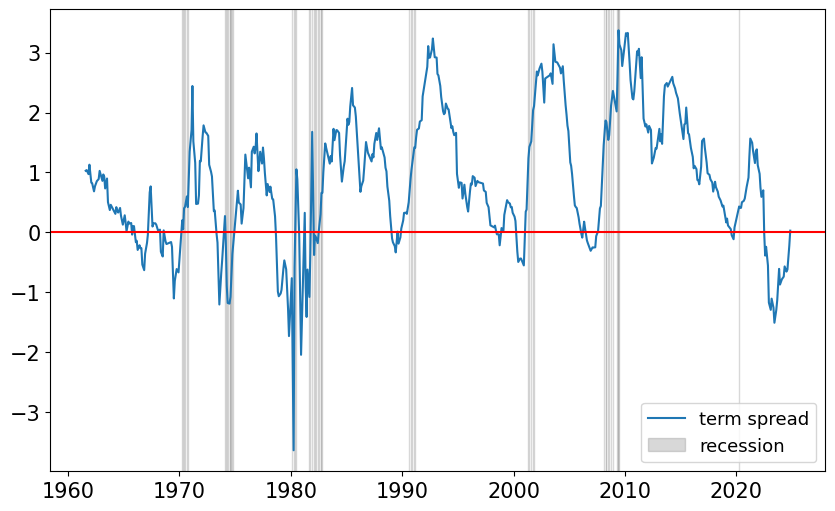

In [5]:
df = pd.DataFrame(TS)
df.columns = ['spread']
df = df.join(rec,how='inner')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df.iloc[:, 0], label='Time Series')  # Plotting the first column

# Adding shaded regions where the second column is 1
for idx, row in df.iterrows():
    if row[1] == 1:
        ax.axvspan(idx, idx + pd.Timedelta(days=1), color='gray', alpha=0.3)

ax.axhline(0, c='r');
ax.legend(['term spread','recession'])
plt.show()

The term spread at the end of the series is negative, thus predicting a recession.

### <span style="color:red">1.2. Term premium</span>

The common explanation for the negative term spread predicting recession is that it reflects the market's forecast of decreasing short-term interest rates due to future economic slowdown.

However, Sacks (and Berner,) are pointing out that the mathematics of yields show there is an extra factor: the term premium, which is a function of the risk premium investors demand for taking on interest-rate risk. Long-term bonds carry interest-rate risk with regard to their short-term valuation. So holding a 10-year bond for 2 years is riskier than holding a 2-year bond for 2 years.

Thus, an inverted yield curve, (i.e. negative term spread,) could be due to a decreasing term premium rather than expected decrease in short rates. A shrinking term premium (risk premium on long term bonds,) is typically associated with a strong market, where risk premia and risk aversion are shrinking.

### <span style="color:red"> 1.3 Forecasting the Short Rate </span>

If the term premium is zero...
* an upward sloping yield curve is indeed a reflection that the market expects short rates to rise over time.
* the market is pricing zero risk premium to long-term bonds. Thus, though there is interest-rate risk to them, the market (in the case of zero term premium,) is saying this is an uncompensated, (and potentially idiosyncratic) risk.

If the term premium jumps up...
* This would cause the term spread to jump, without any change to the forecast of future short rates! Similarly, if the premium decreased, the term spread would go down without any change to forecasted short rates.
* A positive term premium says the market compensates investors willing to hold long-term bonds, presumably as risk premium for the risk of interest-rate movements (which impact the immediate pricing of the long-term bond) as well as possibly inflation risks.

***

## <span style="color:red">2</span>

In [8]:
filepath = '../data/treasury_quotes_2024-10-31.xlsx'
sheet = 'selected quotes'
quotes = pd.read_excel(filepath,sheet_name=sheet).set_index('KYTREASNO')
quotes

,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
KYTREASNO,,,,,,,,,,,,,
208042,note,2024-10-31,2023-04-30,2025-04-30,0.495551,0,3.875,99.712500,99.722203,99.717351,0,99.717351,0.044933
208129,note,2024-10-31,2023-10-31,2025-10-31,0.999316,0,5.000,100.641406,100.660819,100.651113,0,100.651113,0.043311
208213,note,2024-10-31,2024-04-30,2026-04-30,1.494867,0,4.875,100.929688,100.960938,100.945312,0,100.945312,0.042327
208302,note,2024-10-31,2024-10-31,2026-10-31,1.998631,0,4.125,99.933594,99.941406,99.937500,0,99.937500,0.041611
207875,note,2024-10-31,2022-04-30,2027-04-30,2.494182,0,2.750,96.750000,96.781250,96.765625,0,96.765625,0.041346
207960,note,2024-10-31,2022-10-31,2027-10-31,2.997947,0,4.125,99.992188,100.015625,100.003906,0,100.003906,0.041268
208044,note,2024-10-31,2023-04-30,2028-04-30,3.496235,0,3.500,97.902344,97.941406,97.921875,0,97.921875,0.041487
208132,note,2024-10-31,2023-10-31,2028-10-31,4.000000,0,4.875,102.585938,102.621094,102.603516,0,102.603516,0.041623
208216,note,2024-10-31,2024-04-30,2029-04-30,4.495551,0,4.625,101.894531,101.929688,101.912109,0,101.912109,0.041590


### <span style="color:red">2.1. </span>

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve

def bootstrap_spot_rates(df):
    """
    Bootstraps spot rates from a dataframe of bond information.
    
    :param df: Pandas DataFrame with columns 'price', 'cpn rate', and 'ttm'
    :return: Pandas Series of spot rates indexed by TTM
    """
    # Ensure the DataFrame is sorted by TTM
    df = df.sort_values(by='ttm')
    
    # Initialize a dictionary to store spot rates
    spot_rates = {}

    # Iterate over each bond
    for index, row in df.iterrows():
        ttm, coupon_rate, price = row['ttm'], row['cpn rate'], row['price']
        cash_flows = [coupon_rate / 2] * round(ttm * 2)  # Semi-annual coupons
        cash_flows[-1] += 100  # Add the face value to the last cash flow

        # Function to calculate the present value of cash flows
        def pv_of_cash_flows(spot_rate):
            pv = 0
            for t in range(1, len(cash_flows) + 1):
                if t/2 in spot_rates:
                    rate = spot_rates[t/2]
                else:
                    rate = spot_rate
                pv += cash_flows[t - 1] / ((1 + rate / 2) ** t)
            return pv

        # Solve for the spot rate that sets the present value of cash flows equal to the bond price
        spot_rate_guess = (cash_flows[-1] / price) ** (1/(ttm*2)) - 1
        spot_rate = fsolve(lambda r: pv_of_cash_flows(r) - price, x0=spot_rate_guess)[0]

        # Store the calculated spot rate
        spot_rates[ttm] = spot_rate

    return pd.Series(spot_rates)

In [10]:
COMPOUNDING = 2

spot = pd.DataFrame(bootstrap_spot_rates(quotes))
spot.columns = ['rate']
spot['discount factor'] = intrate_to_discount(spot['rate'],spot.index,n_compound=COMPOUNDING)

### <span style="color:red">2.2., 2.3. </span>

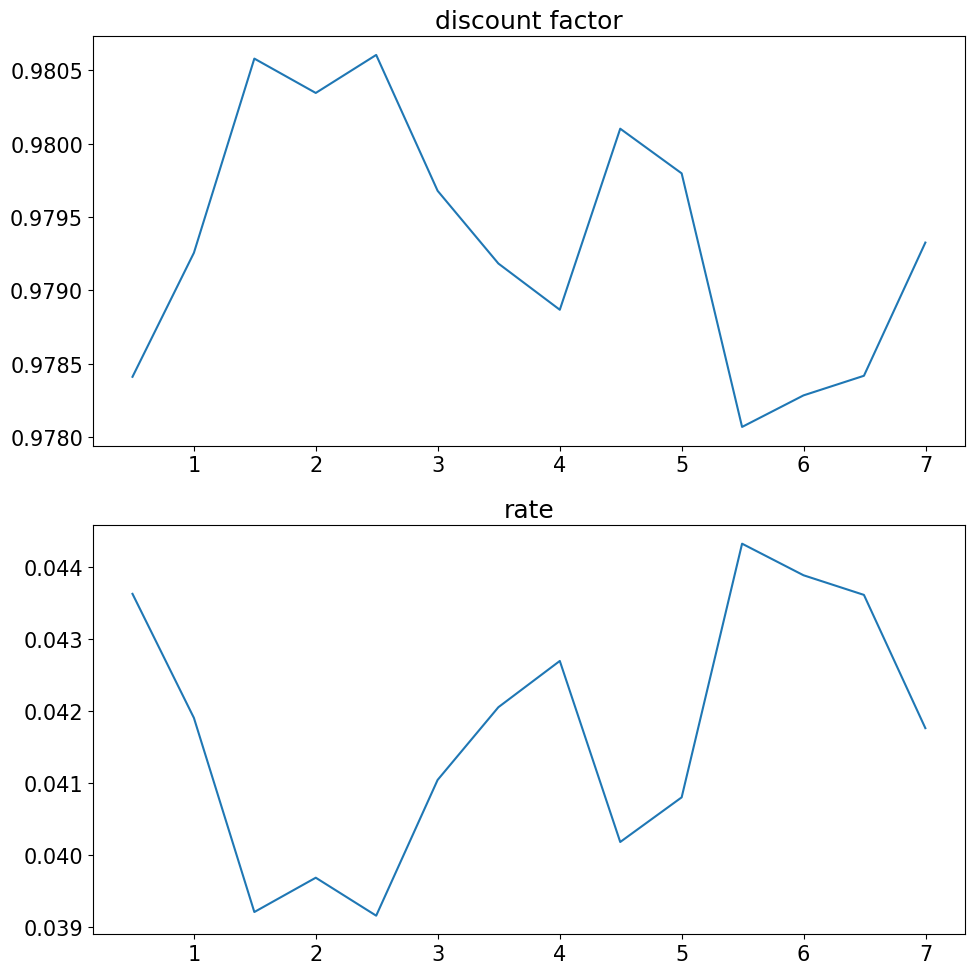

In [8]:
forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[0] = spot['discount factor'].iloc[0]
forward['rate'] = -np.log(forward['discount factor']) / forward.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()

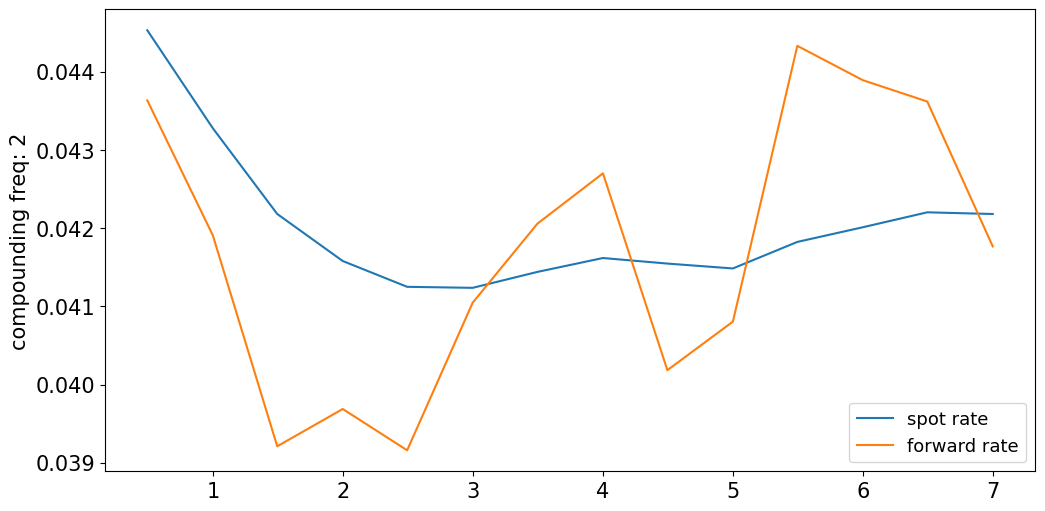

In [9]:
fig, ax = plt.subplots()
spot['rate'].plot(ax=ax)
forward['rate'].plot(ax=ax)
plt.legend(['spot rate','forward rate'])
plt.ylabel(f'compounding freq: {COMPOUNDING}')
plt.show()

### <span style="color:red">2.4. </span>

In [10]:
T2list = [1,4]
for T2 in T2list:
    forwardrate = forward['rate'].iloc[int(T2*2)-1]
    print(f'The Forward Rate at {T2-.5} to {T2} is {forwardrate:.2%}')

The Forward Rate at 0.5 to 1 is 4.19%
The Forward Rate at 3.5 to 4 is 4.27%


***

## <span style="color:red">3</span>

In [11]:
DATE = '2020'

In [12]:
filepath = '../data/famabliss_strips_2024-12-31.xlsx'
prices = pd.read_excel(filepath, sheet_name='prices')
prices.set_index('date',inplace=True)

Select key dates referenced in the question.

In [13]:
FREQ = 12
WINDOW = FREQ * 4 + 1
px = prices.iloc[-WINDOW::FREQ]
px

,1,2,3,4,5
date,,,,,
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740
2024-12-31,0.959864,0.919585,0.880687,0.841768,0.804591


Calculate spot rates for comparison.

In [14]:
spots = -np.log(px)/px.columns
spots

,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001242,0.001571,0.00265,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618
2023-12-29,0.047314,0.041884,0.039398,0.038675,0.038053
2024-12-31,0.040964,0.041916,0.042351,0.043063,0.043484


### <span style="color:red">3.1. </span>

In [15]:
F = px[[2,3,4,5]] / px[[1,2,3,4]].values
F

,2,3,4,5
date,,,,
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870
2023-12-29,0.964203,0.966159,0.964153,0.965059
2024-12-31,0.958037,0.957701,0.955808,0.955836


<Axes: >

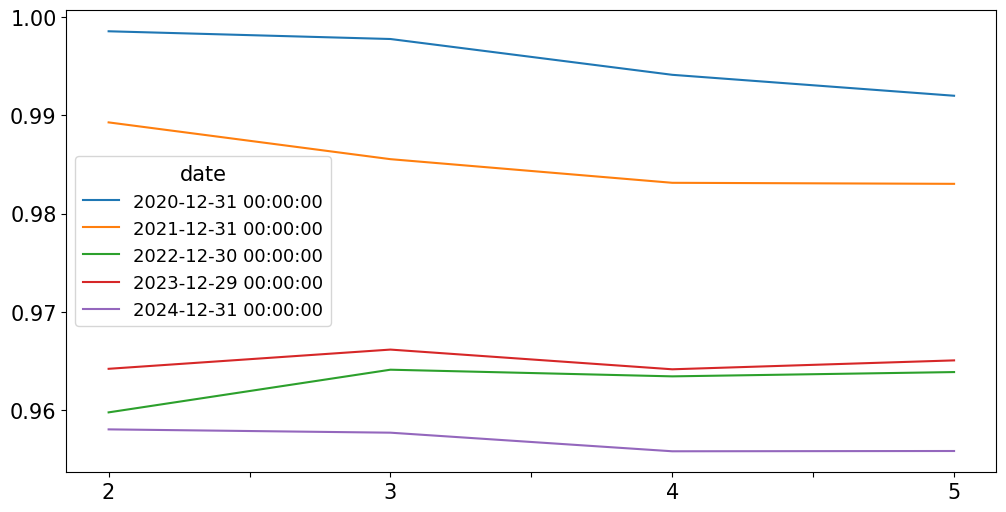

In [16]:
F.T.plot()

### <span style="color:red">3.2. </span>

In [17]:
f = -np.log(F)
f.insert(0,1,spots[1])
f

,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799
2023-12-29,0.047314,0.036454,0.034427,0.036505,0.035566
2024-12-31,0.040964,0.042869,0.043220,0.045199,0.045169


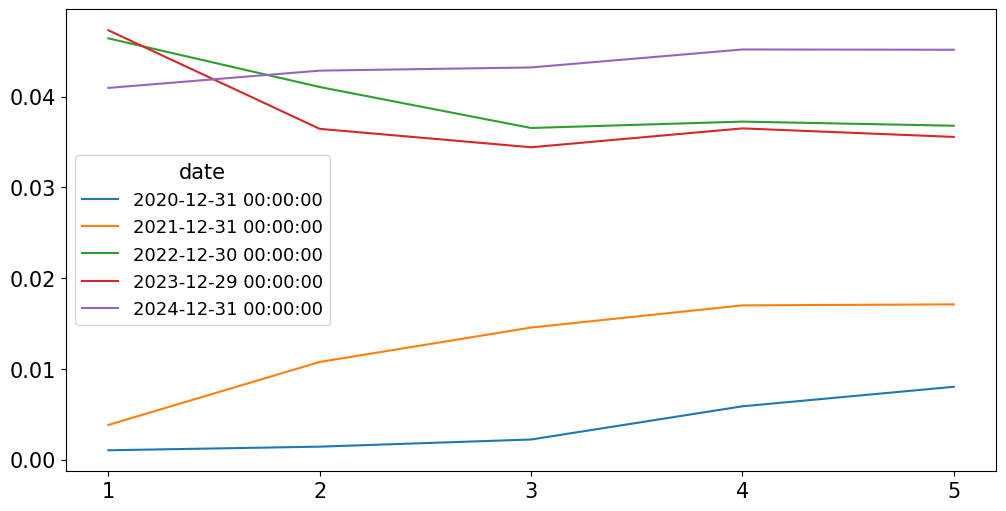

In [18]:
f.T.plot(xticks=f.columns);

### <span style="color:red">3.3. </span>

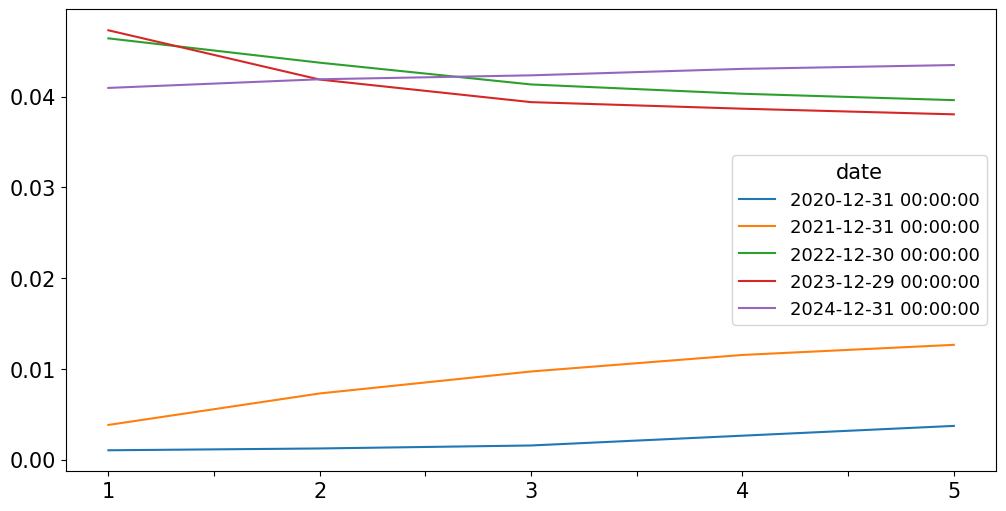

In [19]:
spots.T.plot();

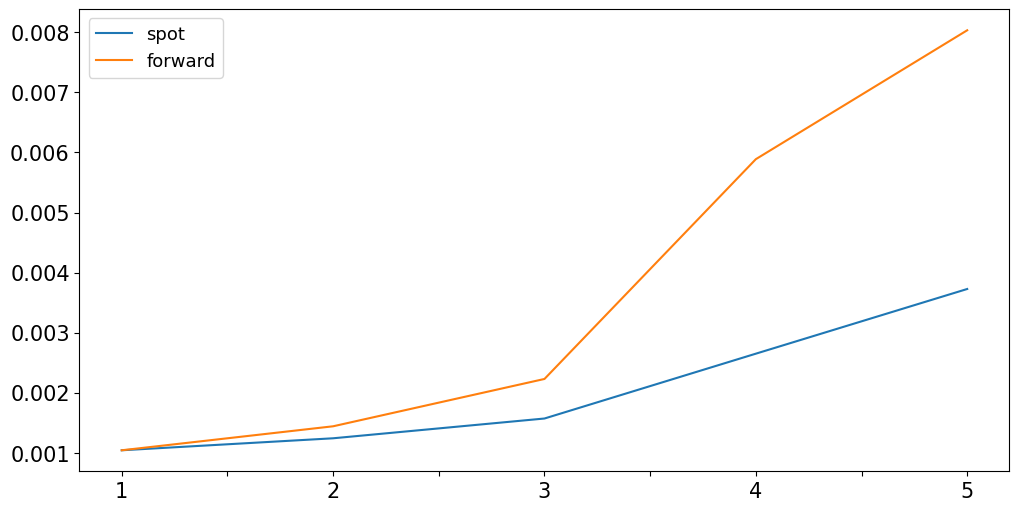

In [20]:
temp = pd.concat([spots.loc[DATE], f.loc[DATE]],axis=0).squeeze()
ax = temp.T.plot()
ax.legend(['spot', 'forward'])
plt.show()

The forward curve is above the spot curve throughout the 5 years, and hence the spot curve is upward sloping over the entire range.

### <span style="color:red">3.4. </span>

In [21]:
temp = f.loc[DATE].T

temp.columns.name = f'{DATE}: (n-1) to n'
temp.columns = [f'forward curve']
temp['spot over time'] = spots[1].values
temp.style.format('{:.2%}')

,forward curve,spot over time
1,0.10%,0.10%
2,0.14%,0.38%
3,0.22%,4.64%
4,0.59%,4.73%
5,0.80%,4.10%


The realized one-year spot rates over 2019-2023 are much lower than what was implied by the 2018 forward curve---with the exception of the realized spot in 2023 (at year 5) being higher than the forward rate implication.

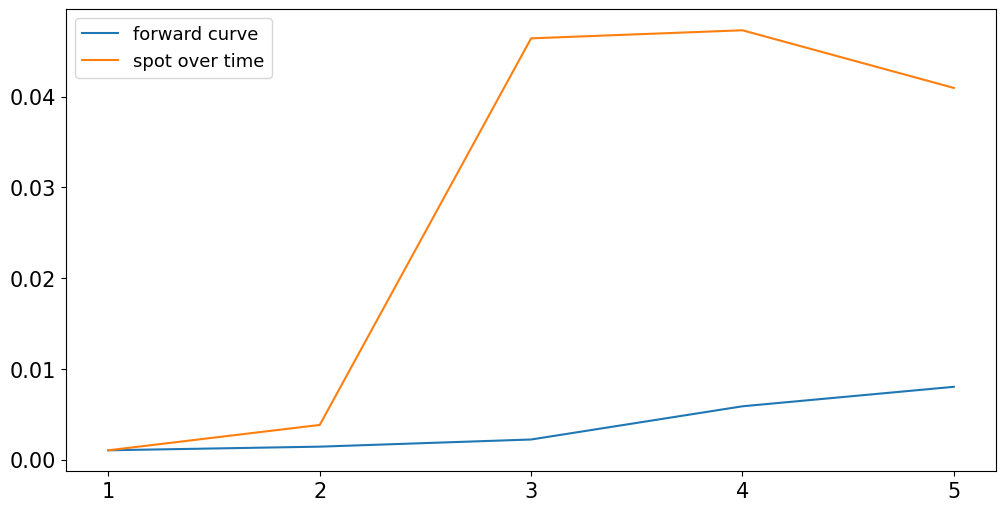

In [22]:
ax = temp.plot(xticks=temp.index)